In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from reproducible_figures import *

In [2]:
from pathlib import Path

from jaxevocomm.utils.hydra_utils import load_config

multirun_dir = Path('multirun/2024-04-01/11-42-40')


def load_data(experiment_dir: Path):
    if not (experiment_dir / 'metrics.csv').exists():
        return None
    metrics = pd.read_csv(experiment_dir / 'metrics.csv')
    config = load_config(experiment_dir)
    for k, v in config.items():
        metrics[k] = v
    return metrics


data = pd.concat([
    load_data(experiment_dir)
    for experiment_dir in multirun_dir.iterdir()
])

In [3]:
data.columns

Index(['iteration', 'mean_episode_length', 'mean_total_reward', 'n_env_steps',
       'num_episodes', 'total_env_steps', 'training_iteration', 'ALGORITHM',
       'SEED', 'LR', 'NUM_ENVS', 'NUM_STEPS', 'TOTAL_TIMESTEPS',
       'UPDATE_EPOCHS', 'NUM_MINIBATCHES', 'GAMMA', 'GAE_LAMBDA', 'CLIP_EPS',
       'SCALE_CLIP_EPS', 'ENT_COEF', 'VF_COEF', 'MAX_GRAD_NORM', 'ANNEAL_LR',
       'ENV_NAME', 'GRID_SIZE', 'N_AGENTS', 'N_PREY', 'N_AGENT_SOUNDS',
       'N_PREY_SOUNDS', 'N_OVERLAPPING_SOUNDS', 'WANDB_MODE', 'ENTITY',
       'PROJECT', 'CHECKPOINT_INTERVAL', 'KEEP_CHECKPOINTS'],
      dtype='object')

/tmp/ipykernel_3935414/3825084936.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=data,


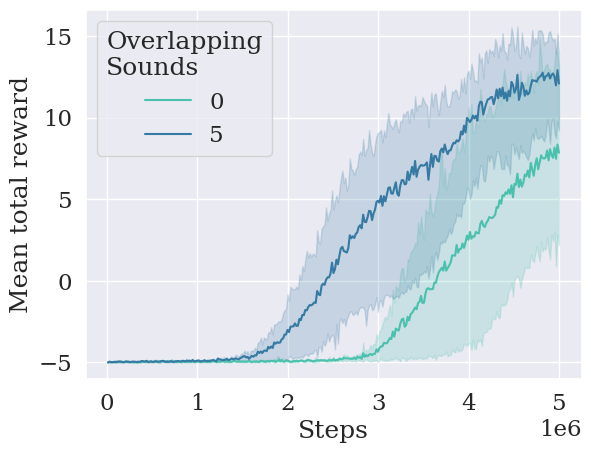

reformatted figures/overlapping_sounds_reward_curves/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [4]:
def plot(data):
    set_plotting_style()
    sns.lineplot(data=data,
                 x='total_env_steps',
                 y='mean_total_reward',
                 hue='N_OVERLAPPING_SOUNDS',
                 palette=sns.color_palette('mako_r', 3),)
    plt.xlabel('Steps')
    plt.ylabel('Mean total reward')
    plt.legend(title='Overlapping\nSounds')


save_reproducible_figure(
    'overlapping_sounds_reward_curves',
    data, plot, show=True
)